In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

import numpy as np
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.preprocessing import sequence

In [16]:
# visualization
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

In [17]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [28]:
nb_epoch = 10
model = Sequential()
model.add(Conv2D(nb_filters, strides=nb_conv, kernel_size=nb_conv, input_shape=(1, img_rows, img_cols), data_format='channels_first'))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, strides=nb_conv, kernel_size=nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), data_format='channels_first'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

/Users/tir/.pyenv/versions/3.6.4/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 1.8579 - acc: 0.3136 - val_loss: 1.4980 - val_acc: 0.4619
Epoch 2/10
 - 3s - loss: 1.4401 - acc: 0.4802 - val_loss: 1.4562 - val_acc: 0.4573
Epoch 3/10
 - 3s - loss: 1.3143 - acc: 0.5310 - val_loss: 1.2534 - val_acc: 0.5456
Epoch 4/10
 - 3s - loss: 1.2551 - acc: 0.5524 - val_loss: 1.2543 - val_acc: 0.5340
Epoch 5/10
 - 3s - loss: 1.2151 - acc: 0.5677 - val_loss: 1.1964 - val_acc: 0.5588
Epoch 6/10
 - 3s - loss: 1.1958 - acc: 0.5755 - val_loss: 1.1714 - val_acc: 0.5794
Epoch 7/10
 - 3s - loss: 1.1797 - acc: 0.5804 - val_loss: 1.1534 - val_acc: 0.5838
Epoch 8/10
 - 3s - loss: 1.1675 - acc: 0.5854 - val_loss: 1.1399 - val_acc: 0.5908
Epoch 9/10
 - 3s - loss: 1.1589 - acc: 0.5884 - val_loss: 1.1460 - val_acc: 0.5898
Epoch 10/10
 - 3s - loss: 1.1509 - acc: 0.5903 - val_loss: 1.1493 - val_acc: 0.5800


In [22]:
model.layers

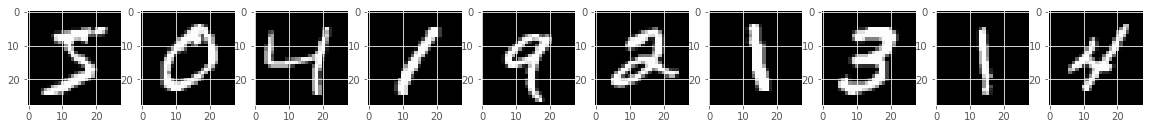

In [23]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw_digit(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

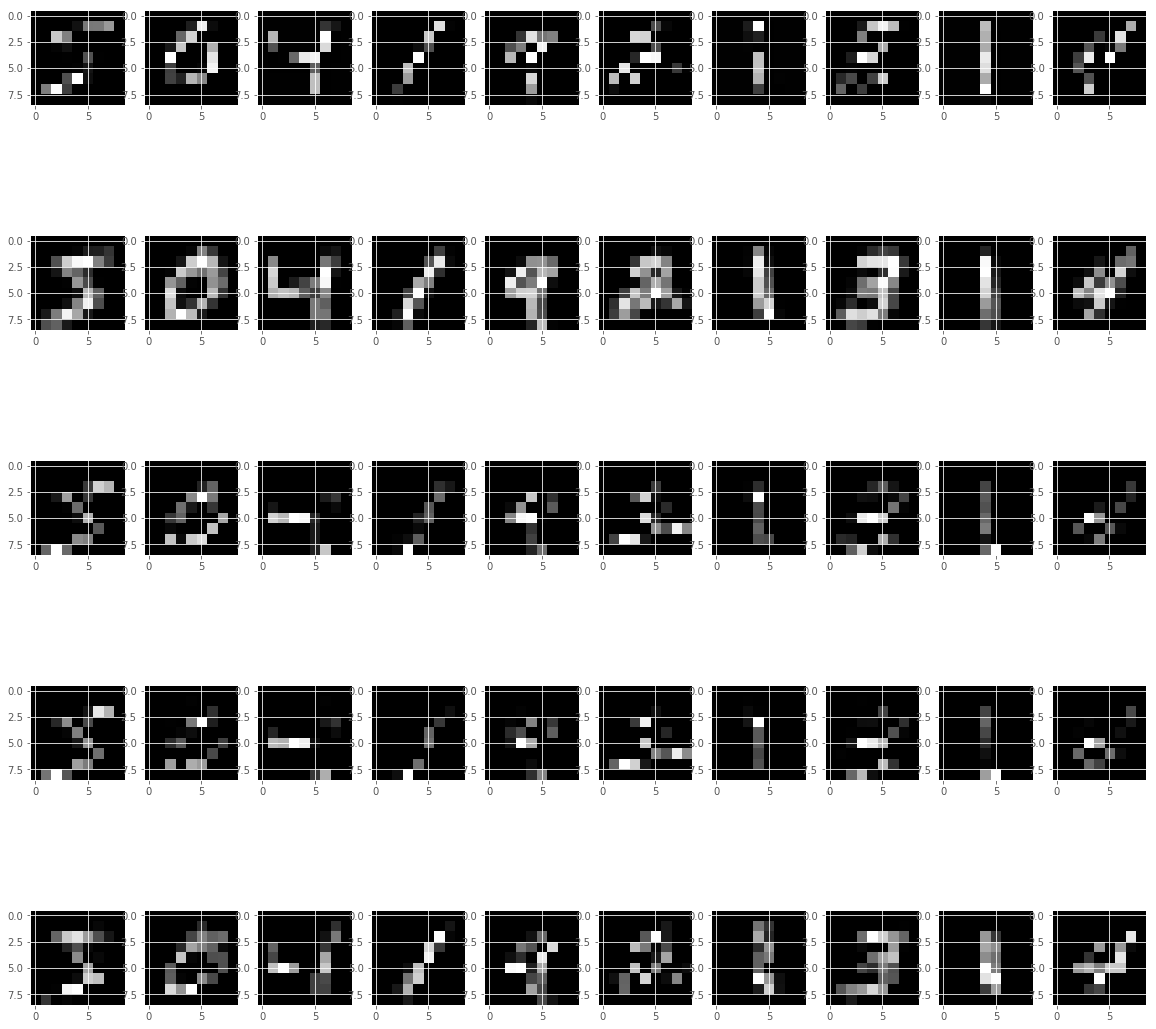

In [24]:
get_first_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

(10, 1, 3, 5)


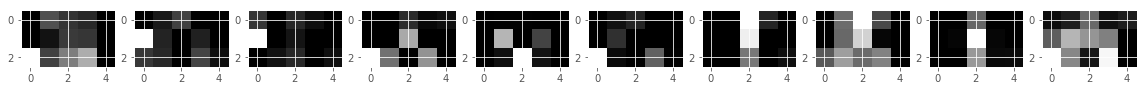

In [25]:
get_second_layer_output = K.function([model.layers[0].input],
                                  [model.layers[3].output])
second_output = get_second_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))
print(second_output.shape)

for img_index, filters in enumerate(second_output, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

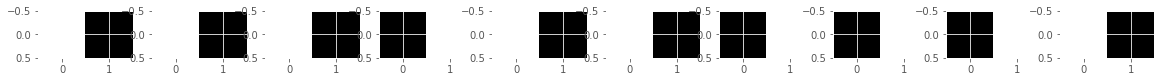

In [26]:
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[4].output])
layers = get_3rd_layer_output([X_train[0:show_size]])[0]

show_size = 10
plt.figure(figsize=(20,20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw_digit(mat, nb_filters, show_size, pos)
plt.show()

In [27]:
model.predict?

In [33]:
type(X_test[0])

numpy.ndarray

In [36]:
X_test.ndim

4

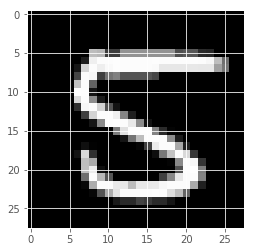

In [98]:
test_idx = np.random.choice(len(X_test))
draw_digit(X_test[test_idx].reshape(28,28), 1, 1, 1)
plt.show()

5


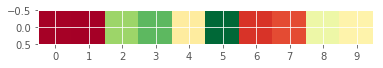

In [99]:
prediction = model.predict(X_test[np.newaxis, test_idx, :, :])
plt.imshow(prediction, cmap=plt.cm.RdYlGn)
print(prediction.argmax())
_ = plt.xticks(np.arange(10))